In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=10,4
sns.set_style('darkgrid')

In [2]:
forest=pd.read_csv(r'C:\Users\admin\Downloads\forest+fires\forestfires.csv')

In [3]:
forest

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [4]:
forest.shape

(517, 13)

In [5]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [6]:
forest.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [7]:
forest.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [8]:
len(forest.columns)

13

In [9]:
forest.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [10]:
forest.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [11]:
forest.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [12]:
forest.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [13]:
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


<Axes: xlabel='X', ylabel='Density'>

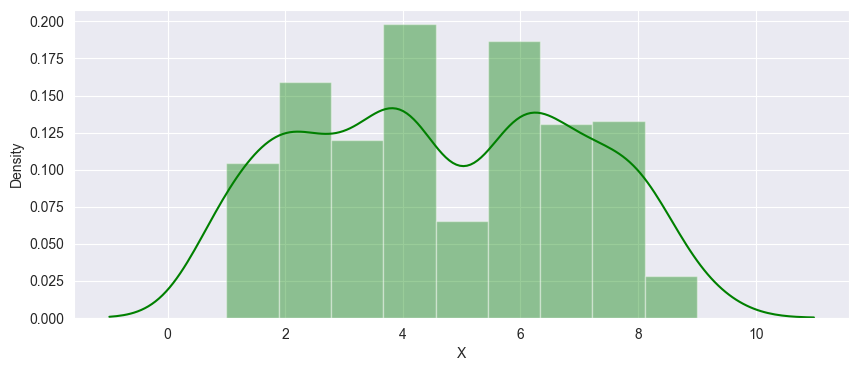

In [14]:
sns.distplot(forest.X,color='g')

<Axes: xlabel='Y', ylabel='Density'>

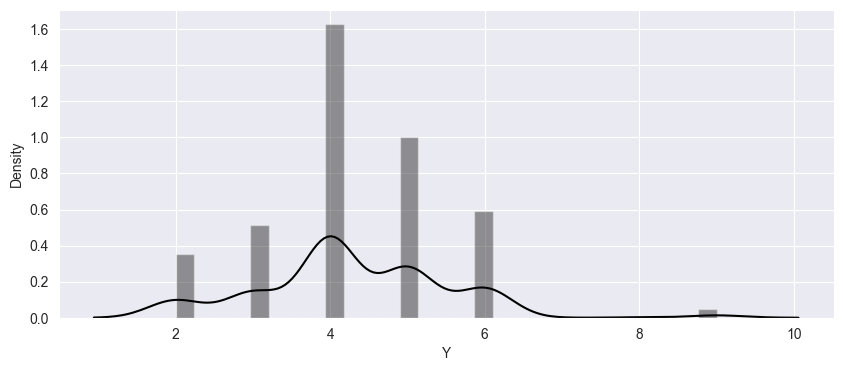

In [15]:
sns.distplot(forest.Y,color='k')

<Axes: xlabel='FFMC', ylabel='Density'>

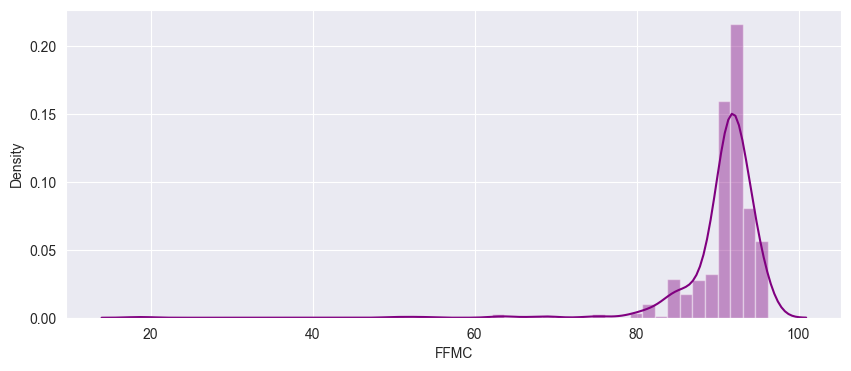

In [16]:
sns.distplot(forest.FFMC,color='Purple')

<Axes: xlabel='DMC', ylabel='Density'>

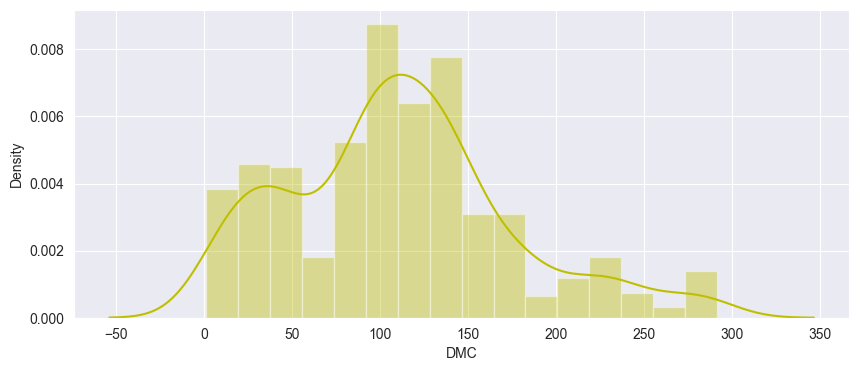

In [17]:
sns.distplot(forest.DMC	,color='y')

<Axes: xlabel='temp', ylabel='Density'>

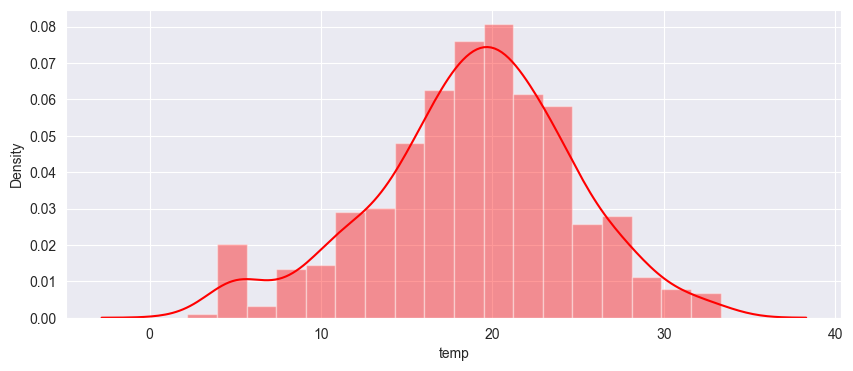

In [18]:
sns.distplot(forest.temp,color='r')

<Axes: xlabel='wind', ylabel='Density'>

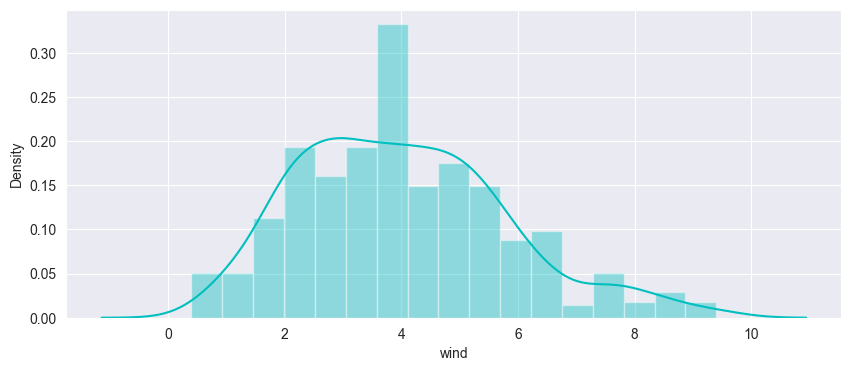

In [19]:
sns.distplot(forest.wind,color='c')

In [20]:
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


<Axes: xlabel='month', ylabel='count'>

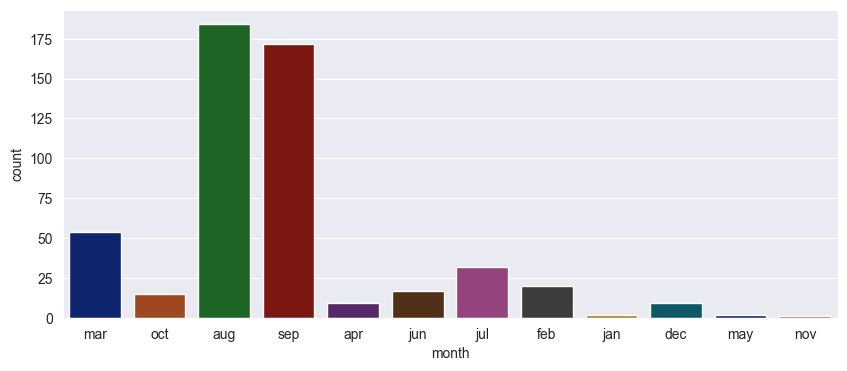

In [21]:
sns.countplot(data=forest,x='month',palette='dark')

<Axes: xlabel='day', ylabel='count'>

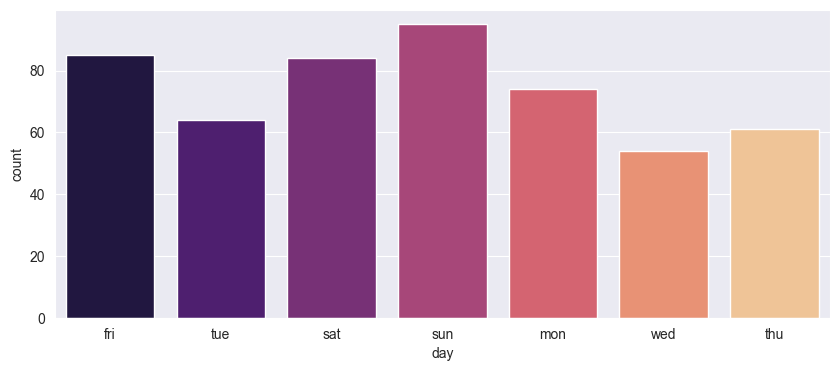

In [22]:
sns.countplot(data=forest,x='day',palette='magma')

<Axes: xlabel='day', ylabel='count'>

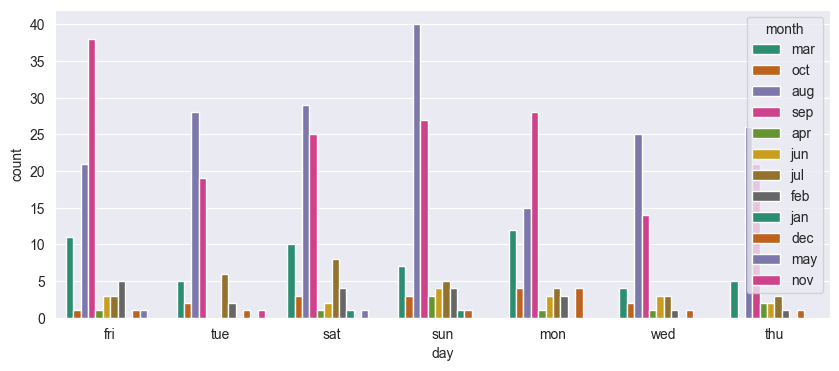

In [23]:
sns.countplot(data=forest,x='day',palette='Dark2',hue='month')

In [24]:
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


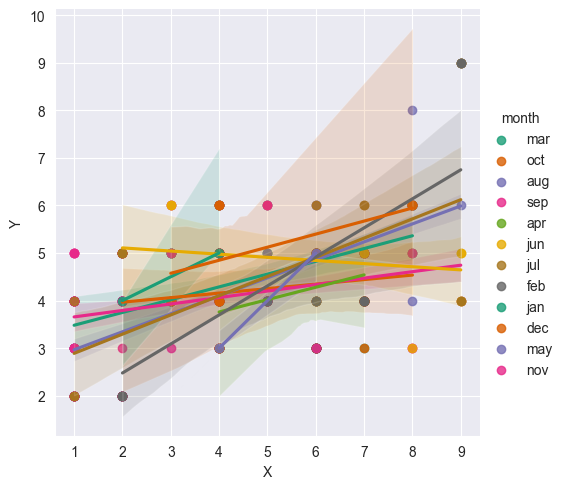

In [25]:
sns.lmplot(data=forest,x='X',y='Y',palette='Dark2',hue='month')

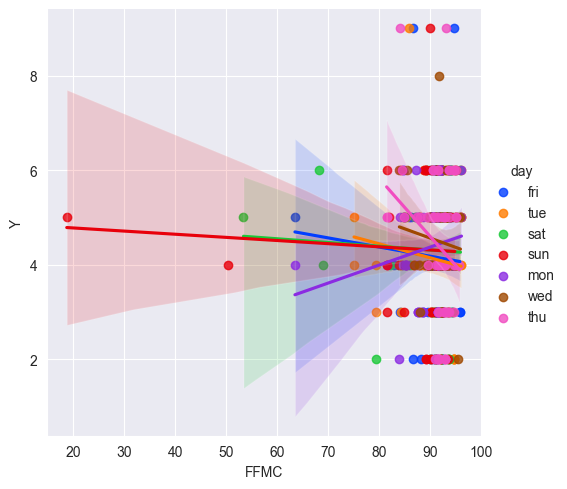

In [26]:
sns.lmplot(data=forest,x='FFMC',y='Y',palette='bright',hue='day')

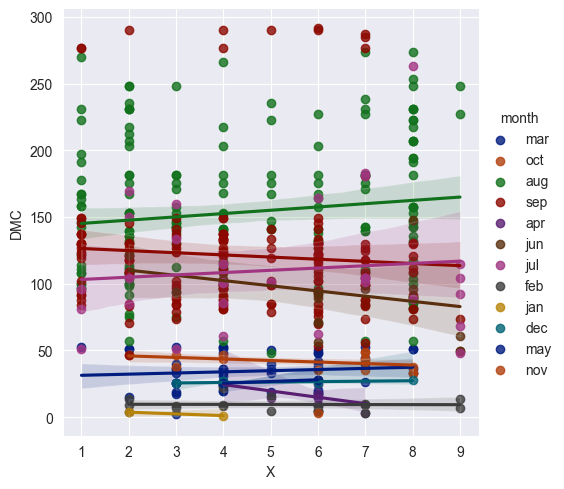

In [27]:
sns.lmplot(data=forest,x='X',y='DMC',palette='dark',hue='month')

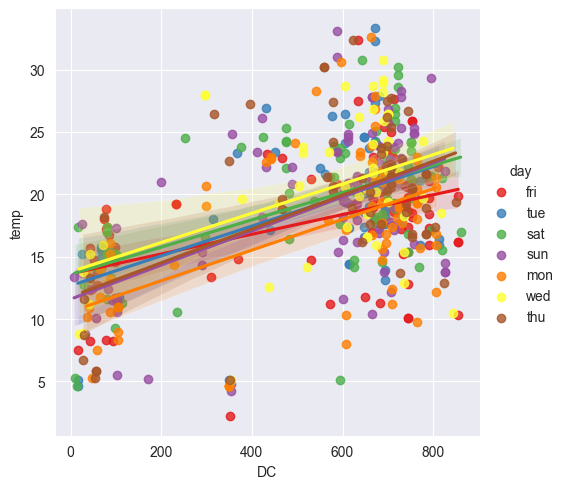

In [28]:
sns.lmplot(data=forest,x='DC',y='temp',palette='Set1',hue='day')

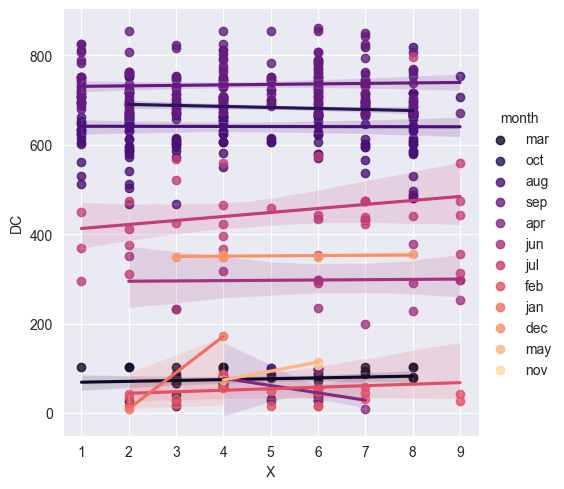

In [29]:
sns.lmplot(data=forest,x='X',y='DC',palette='magma',hue='month')

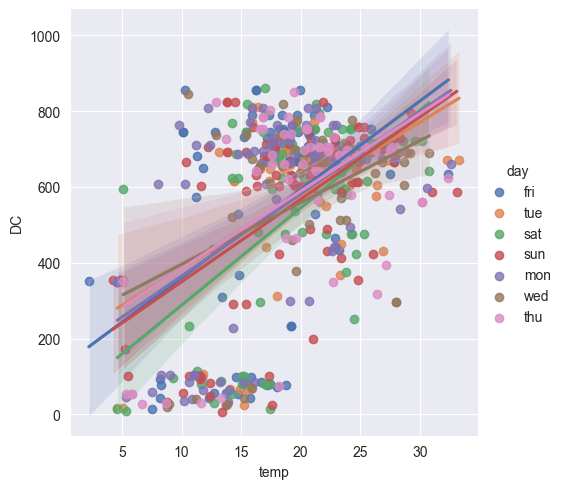

In [30]:
sns.lmplot(data=forest,x='temp',y='DC',palette='deep',hue='day')

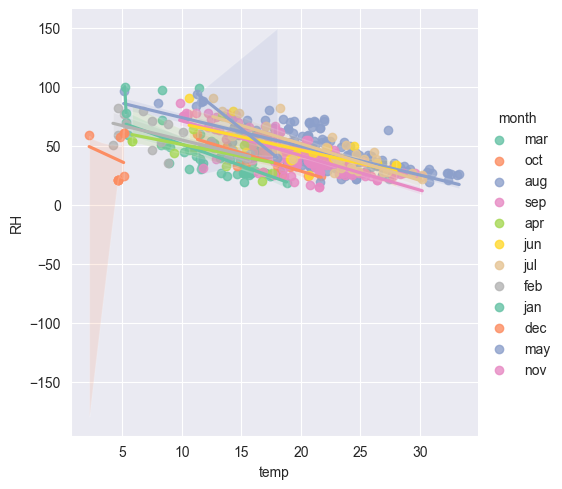

In [31]:
sns.lmplot(data=forest,x='temp',y='RH',palette='Set2',hue='month')

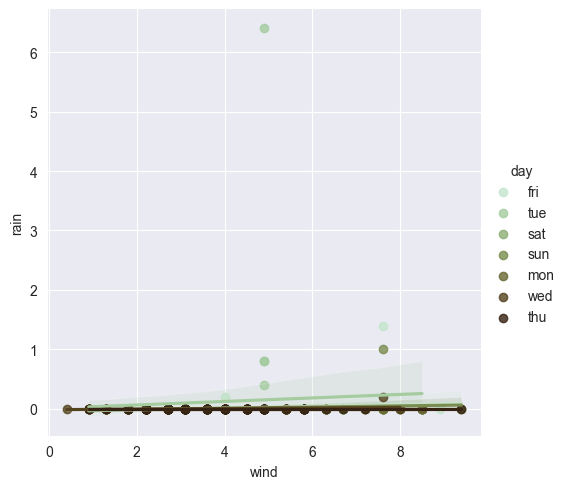

In [32]:
sns.lmplot(data=forest,x='wind',y='rain',palette='ch:67',hue='day')

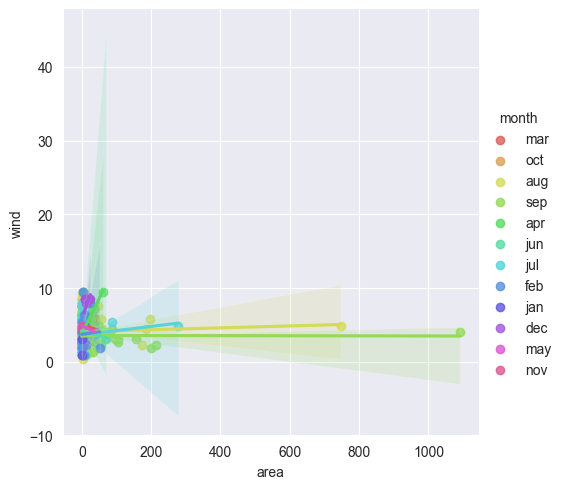

In [33]:
sns.lmplot(data=forest,x='area',y='wind',palette='hls',hue='month')

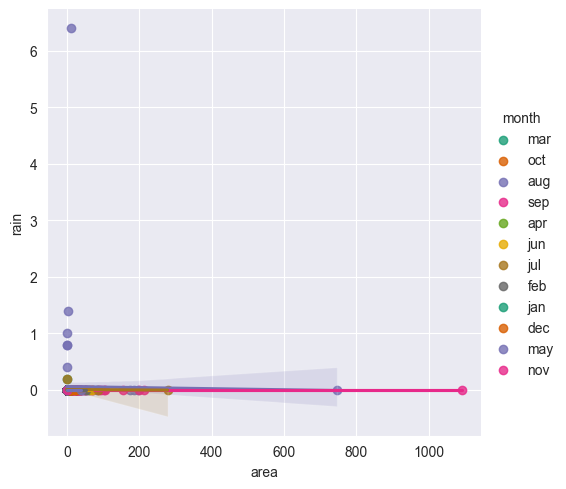

In [34]:
sns.lmplot(data=forest,x='area',y='rain',palette='Dark2',hue='month')

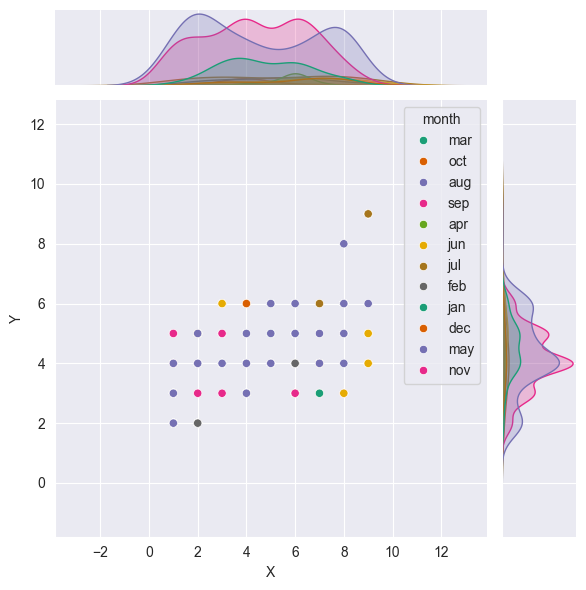

In [35]:
sns.jointplot(data=forest,x='X',y='Y',palette='Dark2',hue='month')

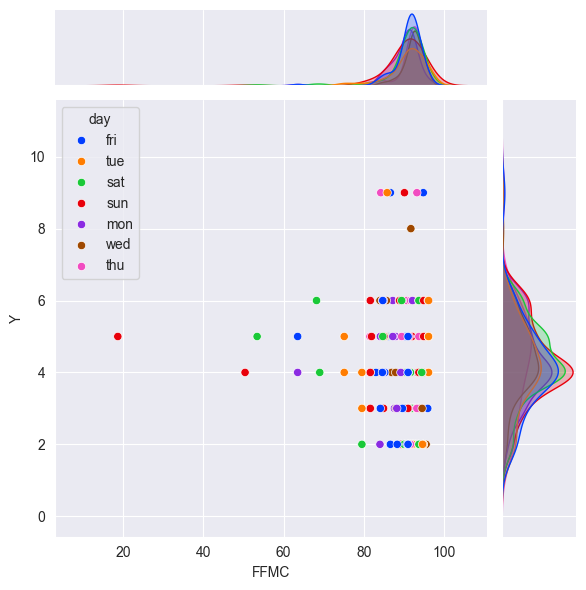

In [36]:
sns.jointplot(data=forest,x='FFMC',y='Y',palette='bright',hue='day')

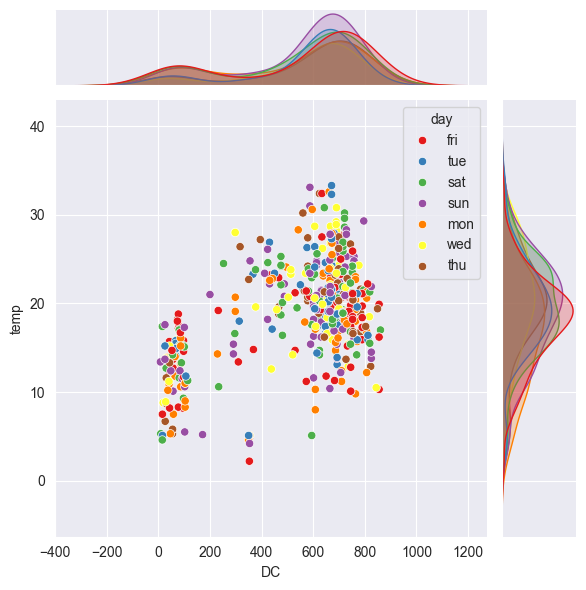

In [37]:
sns.jointplot(data=forest,x='DC',y='temp',palette='Set1',hue='day')

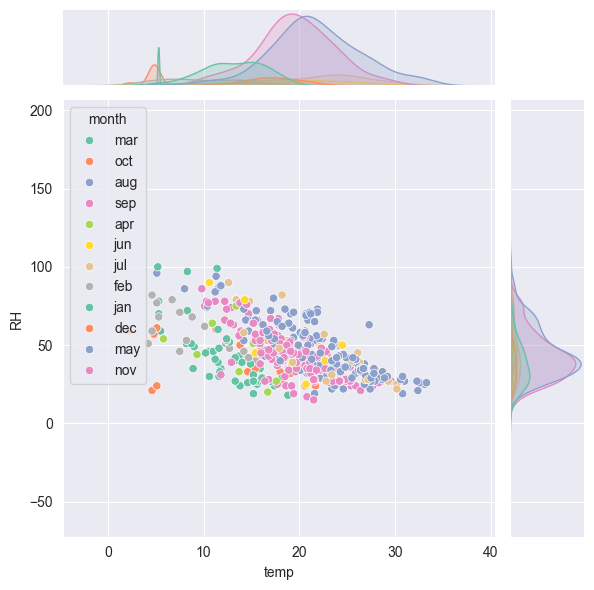

In [38]:
sns.jointplot(data=forest,x='temp',y='RH',palette='Set2',hue='month')

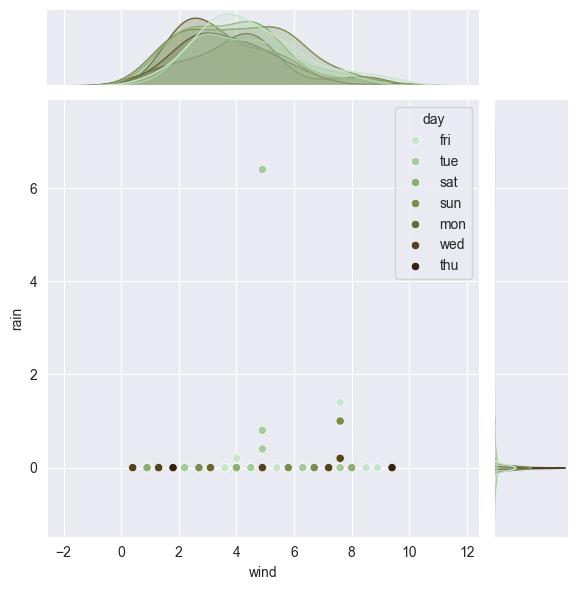

In [39]:
sns.jointplot(data=forest,x='wind',y='rain',palette='ch:67',hue='day')

In [40]:
forest.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


<Axes: xlabel='day', ylabel='Y'>

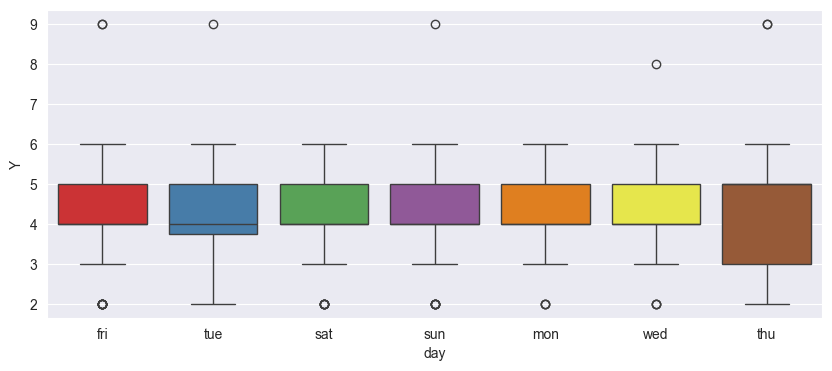

In [41]:
sns.boxplot(data=forest,x='day',y='Y',palette='Set1')

<Axes: xlabel='month', ylabel='X'>

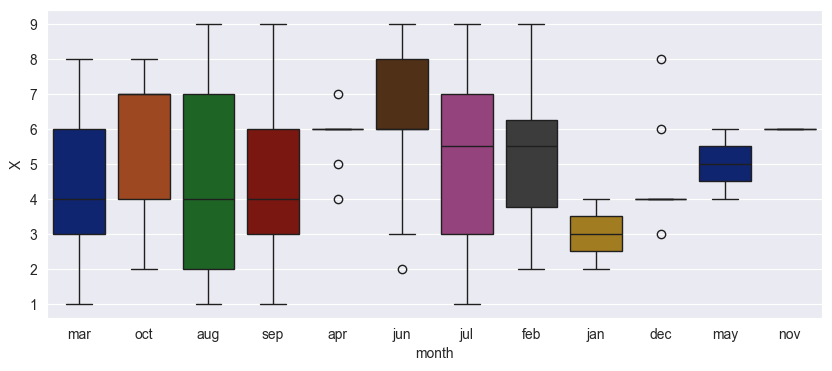

In [42]:
sns.boxplot(data=forest,x='month',y='X',palette='dark')

<Axes: xlabel='month', ylabel='FFMC'>

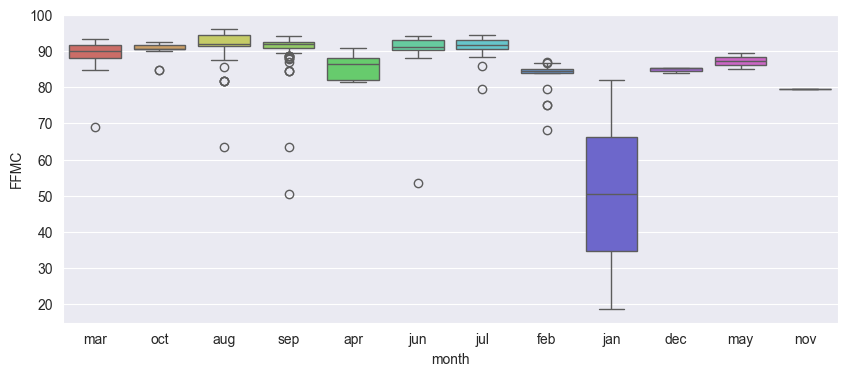

In [43]:
sns.boxplot(data=forest,x='month',y='FFMC',palette='hls')

<Axes: xlabel='month', ylabel='DC'>

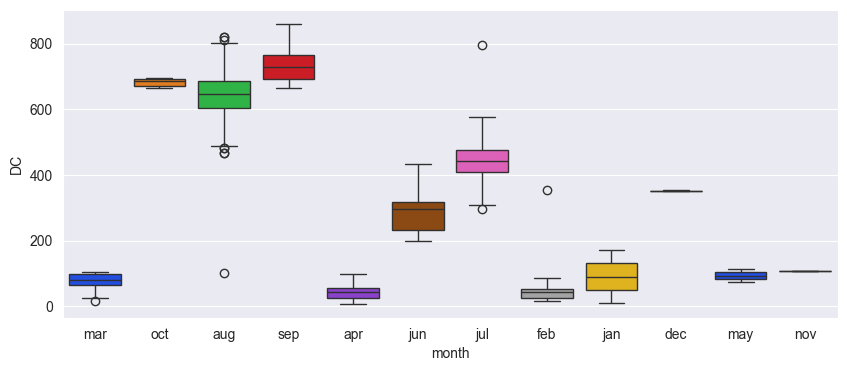

In [44]:
sns.boxplot(data=forest,x='month',y='DC',palette='bright')

<Axes: xlabel='day', ylabel='ISI'>

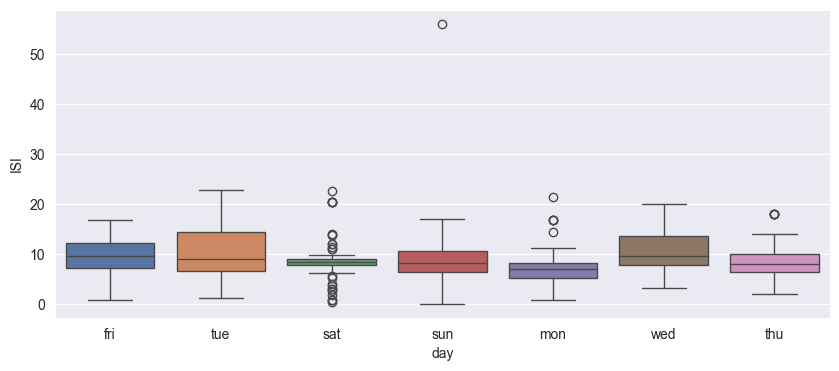

In [45]:
sns.boxplot(data=forest,x='day',y='ISI',palette='deep')

<Axes: xlabel='day', ylabel='DMC'>

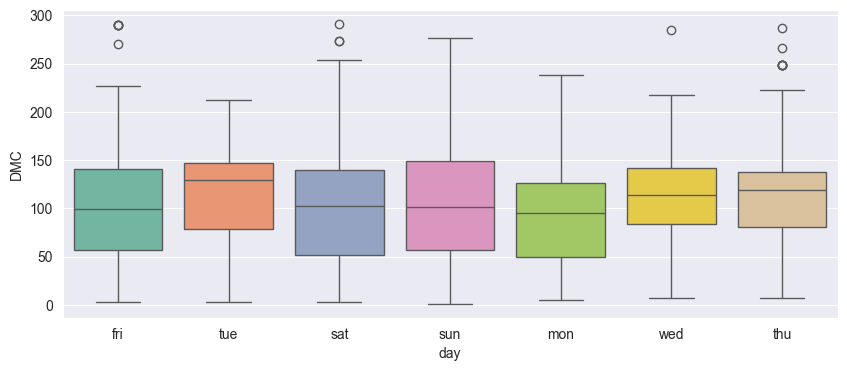

In [46]:
sns.boxplot(data=forest,x='day',y='DMC',palette='Set2')

<Axes: xlabel='day', ylabel='RH'>

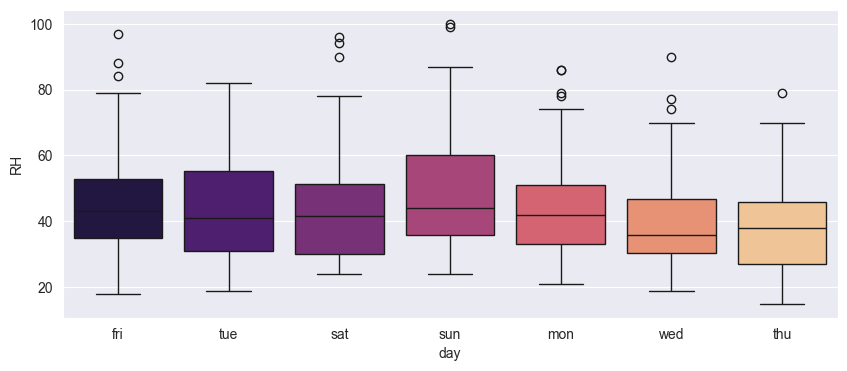

In [47]:
sns.boxplot(data=forest,x='day',y='RH',palette='magma')

<Axes: xlabel='month', ylabel='wind'>

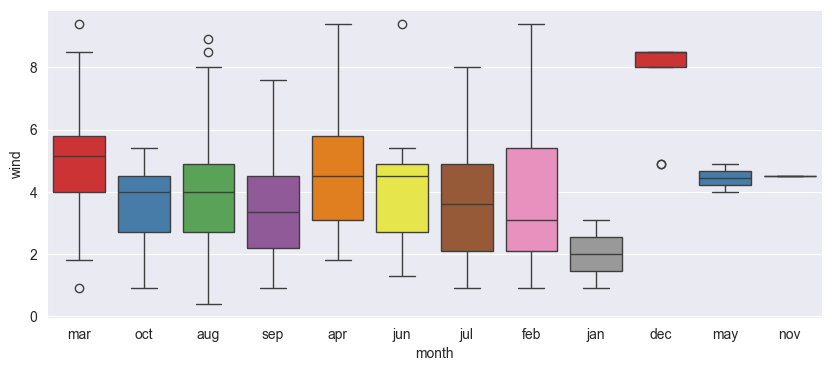

In [48]:
sns.boxplot(data=forest,x='month',y='wind',palette='Set1')

<Axes: xlabel='month', ylabel='temp'>

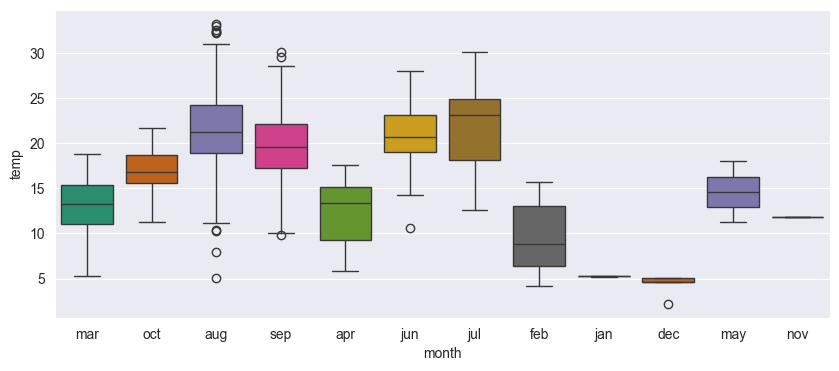

In [49]:
sns.boxplot(data=forest,x='month',y='temp',palette='Dark2')

<Axes: xlabel='day', ylabel='area'>

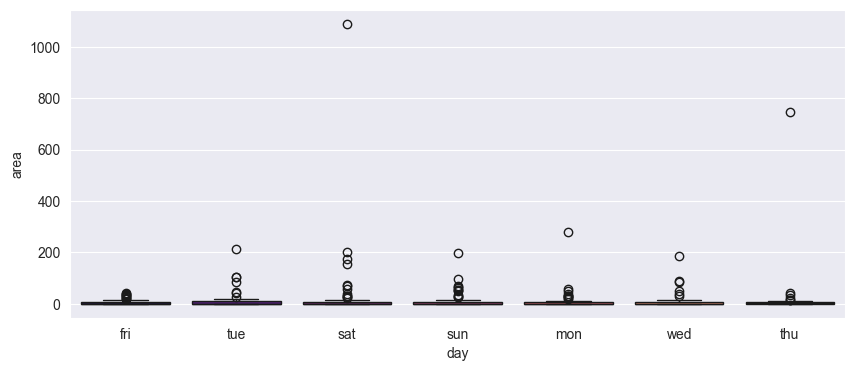

In [50]:
sns.boxplot(data=forest,x='day',y='area',palette='magma')